# PCA Analysis

In [1]:
import sys
sys.path.append("/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI")
from loadData import allData

=== ECONOMIC CATEGORIES ===
Distribution:
economic_category
0     1
1    25
2    50
3    54
4    63
Name: count, dtype: int64
Uncategorized countries: 1

=== GEOGRAPHICAL CATEGORIES ===
Distribution:
geographical_category
0     1
1     8
2    52
3    20
4    47
5    33
6    30
7     2
Name: count, dtype: int64
Uncategorized countries: 1

=== EDUCATIONAL CATEGORIES ===
Distribution:
educational_category
0     1
1    28
2    74
3    90
Name: count, dtype: int64
Uncategorized countries: 1

=== OVERLAP CHECKS ===
Countries in multiple economic categories: 0
Countries in multiple geographical categories: 0
Countries in multiple educational categories: 0

=== SAMPLE DATA ===
               country  economic_category  geographical_category  \
0          Afghanistan                  1                      1   
1              Albania                  3                      2   
2              Algeria                  3                      3   
3              Andorra                  4         

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the processed data
data_path = '/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI/grouped_country_data.csv'  # Update with the correct path to your processed data
df = allData

# Display the first few rows of the DataFrame
df.head()

,country,text,answer,word_count,avg_word_length,sentence_count,avg_sentence_length,sentiment_polarity,flesch_reading_ease,personal,...,Membership Document Symbol,grammatical_analysis,academic,vocational,userConsiderations,background,international,economic_category,geographical_category,educational_category
0,Afghanistan,Uddannelsesmuligheder i Danmark\nI'm a 16 year...,\nThank you for sharing your background — that...,447.2,4.94,31.0,15.06,0.191873,48.022778,0.6,...,A/RES/34 (I),889.0,19.2,9.8,12.4,6.0,0.2,1,1,1
1,Albania,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,449.2,5.00,34.0,13.38,0.199854,46.045864,0.6,...,A/RES/995 (X),873.8,24.4,10.6,12.6,6.4,0.4,3,2,3
2,Algeria,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,470.6,4.92,31.2,15.60,0.207120,48.005737,1.2,...,A/RES/1754 (XVII),912.2,21.2,11.2,12.0,6.2,0.2,3,3,2
3,Andorra,Uddannelsesvalg efter folkeskolen\nI'm a 16 ye...,\nThank you for sharing a bit about yourself —...,438.6,5.04,30.0,14.82,0.182773,44.261592,0.4,...,A/RES/47/232,868.0,21.0,8.6,12.0,7.6,0.8,4,2,3
4,Angola,Uddannelsesvalg efter folkeskole\nI'm a 16 yea...,\nThanks for sharing — you're in a very import...,426.6,4.92,32.6,13.36,0.197741,49.292963,0.8,...,A/RES/31/44,843.2,22.8,13.8,10.6,5.8,0.0,2,4,2


In [3]:
# Select only the features of interest
features = ['academic', 'vocational', 'userConsiderations', 'background','international','grammatical_analysis']
x = df[features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, df[['country']]], axis=1)

# Display the principal components DataFrame
final_df.head()

,Principal Component 1,Principal Component 2,country
0,-1.504172,-0.588180,Afghanistan
1,-0.006956,-0.120209,Albania
2,-0.208215,-0.859730,Algeria
3,-1.316727,1.012052,Andorra
4,-0.364570,-2.399014,Angola


In [4]:
# Load group info (income and region)
income_df = pd.read_csv('/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI/income_un_members_only.csv', delimiter=';')
# Fix Venezuela label if needed
income_df.loc[income_df['Economy'] == 'Venezuela (Bolivarian Republic of)', 'Income group'] = 'Upper middle income'

# Merge with PCA DataFrame
final_df = final_df.merge(
    income_df[['Economy', 'Income group', 'Region']],
    left_on='country',
    right_on='Economy',
    how='left'
)

# Optional: Load and merge education group
education_df = pd.read_csv('/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI/education_un_members_only.csv', delimiter=';')
education_df = education_df[education_df.columns[0]].str.split(',', expand=True)
education_df.columns = ['Economy', 'Year', 'Economy_Code', 'Educational_Attainment']
education_df["Educational_Attainment"] = pd.to_numeric(education_df["Educational_Attainment"], errors="coerce")
education_df.fillna(education_df["Educational_Attainment"].mean(), inplace=True)
education_df = education_df[['Economy', 'Educational_Attainment']]
final_df = final_df.merge(education_df, on='Economy', how='left')

Explained variance of PC1: 0.2953
Explained variance of PC2: 0.2259
Explained variance of PC3: 0.1673
Explained variance of PC4: 0.1542
Explained variance of PC5: 0.0957


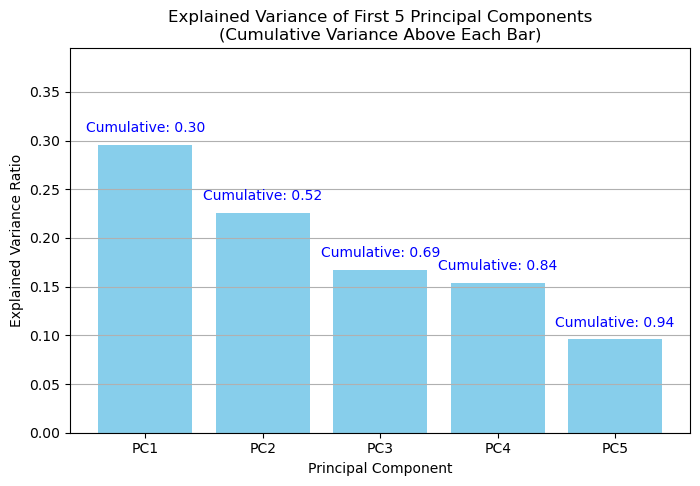

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redo PCA with at least 5 components (or as many as features if fewer)
n_components = min(5, x.shape[1])
pca_5 = PCA(n_components=n_components)
components_5 = pca_5.fit_transform(x)
explained_var = pca_5.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Print explained variance for each component
for i, var in enumerate(explained_var, 1):
    print(f"Explained variance of PC{i}: {var:.4f}")

# Barplot of the first 5 principal components' explained variance
plt.figure(figsize=(8, 5))
bars = plt.bar([f'PC{i+1}' for i in range(n_components)], explained_var, color='skyblue')

# Annotate cumulative variance above each bar
for i, cum_var in enumerate(cumulative_var):
    plt.text(i, explained_var[i] + 0.01, f"Cumulative: {cum_var:.2f}", 
             ha='center', va='bottom', fontsize=10, color='blue')

plt.title('Explained Variance of First 5 Principal Components\n(Cumulative Variance Above Each Bar)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, max(explained_var) + 0.1)
plt.grid(axis='y')
plt.show()

PCA Loadings (contribution of each feature to each principal component):


,PC1,PC2
academic,0.545820,0.175328
vocational,0.455732,-0.538051
userConsiderations,0.222990,0.216180
background,0.310793,0.288342
international,-0.070489,0.733601
grammatical_analysis,0.585751,0.108237


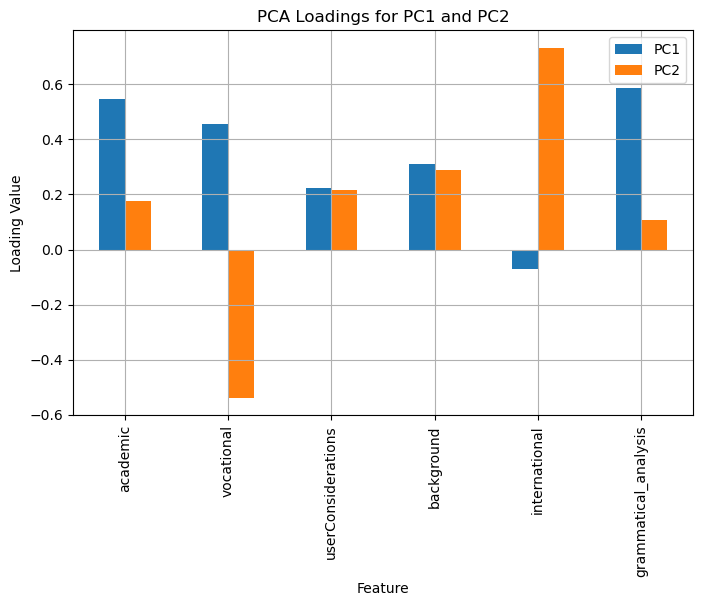

In [13]:
# Show PCA loadings for the first two principal components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("PCA Loadings (contribution of each feature to each principal component):")
display(loadings)

# Bar plot of loadings for PC1 and PC2
loadings.plot(kind='bar', figsize=(8, 5))
plt.title('PCA Loadings for PC1 and PC2')
plt.ylabel('Loading Value')
plt.xlabel('Feature')
plt.grid()
plt.show()

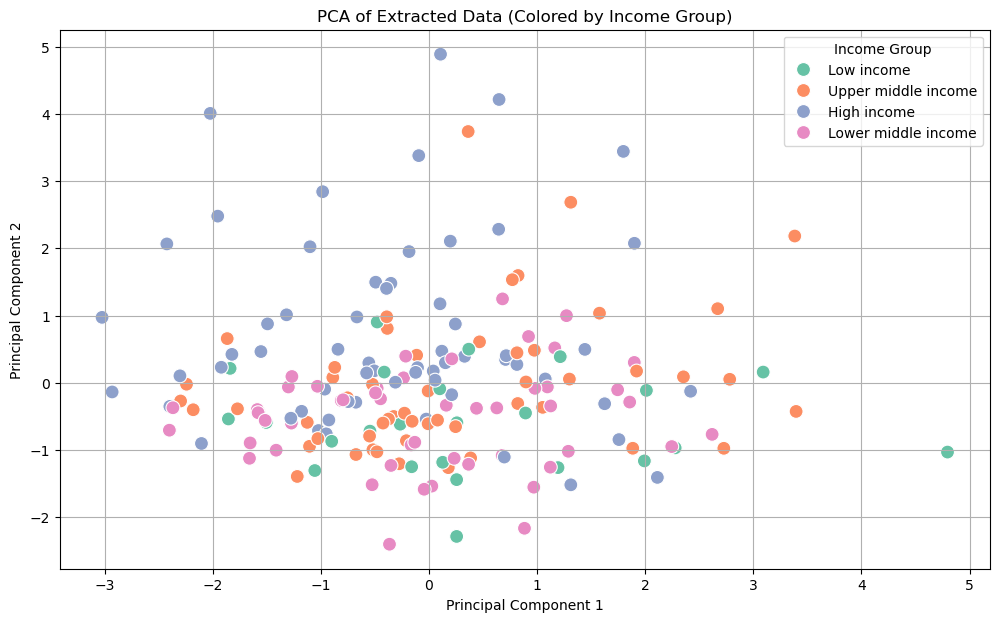

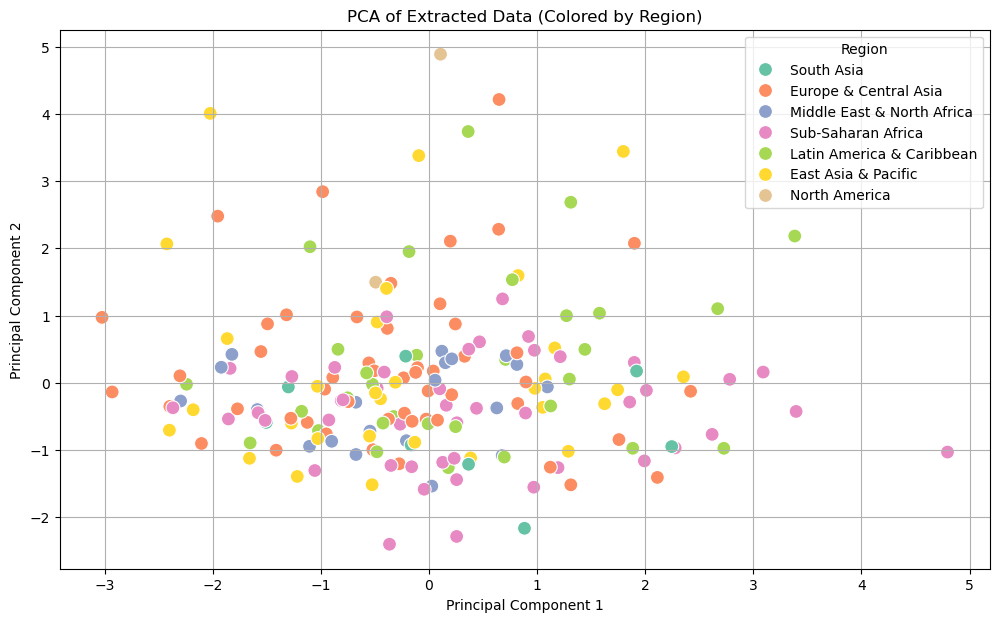

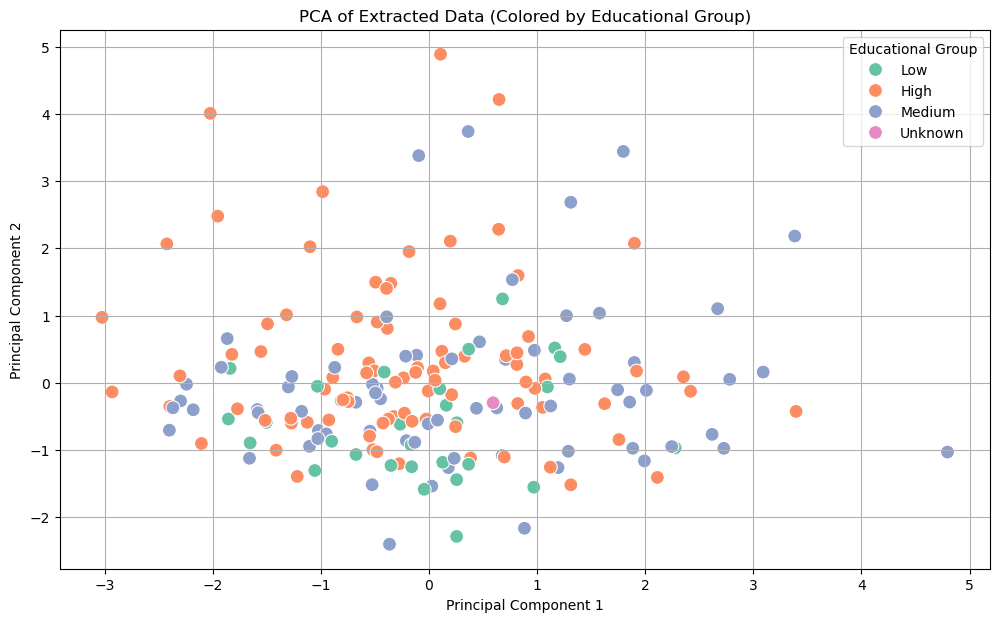

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Plot by Income group
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Income group',
    palette='Set2',
    s=100,
    alpha=1.0
)
plt.title('PCA of Extracted Data (Colored by Income Group)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Income Group')
plt.grid()
plt.show()

# 2. Plot by Region
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Region',
    palette='Set2',
    s=100,
    alpha=1.0
)
plt.title('PCA of Extracted Data (Colored by Region)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Region')
plt.grid()
plt.show()

# 3. Plot by Educational group (Low/Medium/High)
# First, create a categorical educational group
def edu_group(attainment):
    if pd.isnull(attainment):
        return 'Unknown'
    elif attainment < 50:
        return 'Low'
    elif attainment < 90:
        return 'Medium'
    else:
        return 'High'

final_df['Educational Group'] = final_df['Educational_Attainment'].apply(edu_group)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Educational Group',
    palette='Set2',
    s=100,
    alpha=1.0
)
plt.title('PCA of Extracted Data (Colored by Educational Group)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Educational Group')
plt.grid()
plt.show()

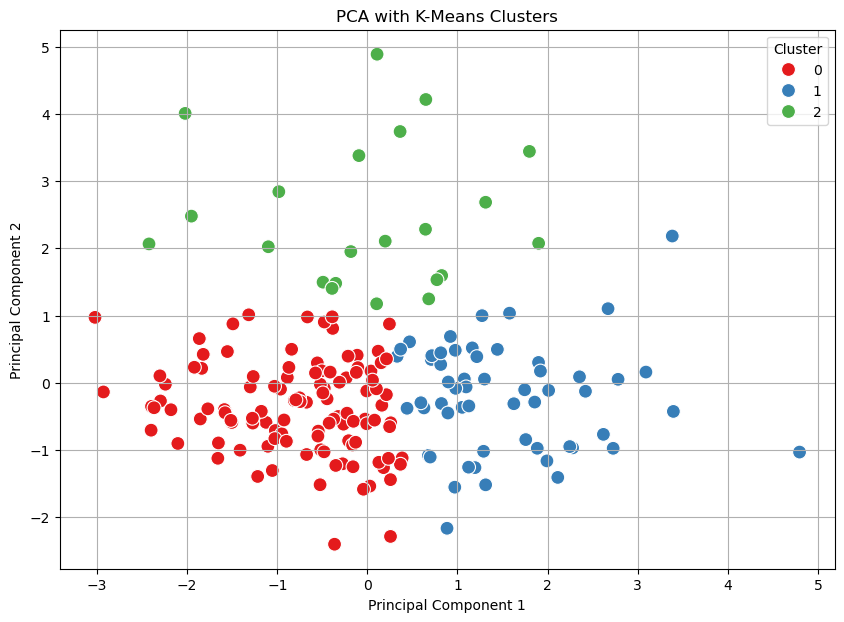

In [8]:
from sklearn.cluster import KMeans

# Use the first two principal components
X_pca = final_df[['Principal Component 1', 'Principal Component 2']].values

# Fit K-Means (choose k, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X_pca)

# Plot with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title('PCA with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [9]:
def print_cluster_pattern(crosstab, group_name):
    print(f"\nCluster vs. {group_name}:")
    display(crosstab)
    # Calculate and print purity for each cluster
    for cluster in crosstab.index:
        total = crosstab.loc[cluster].sum()
        dominant = crosstab.loc[cluster].max()
        dominant_group = crosstab.loc[cluster].idxmax()
        purity = dominant / total if total > 0 else 0
        print(f"  Cluster {cluster}: {dominant_group} is dominant ({dominant}/{total}, purity={purity:.2f})")
    print("-" * 50)

# 1. Income group
income_crosstab = pd.crosstab(final_df['Cluster'], final_df['Income group'])
print_cluster_pattern(income_crosstab, "Income group")

# 2. Region
region_crosstab = pd.crosstab(final_df['Cluster'], final_df['Region'])
print_cluster_pattern(region_crosstab, "Region")

# 3. Educational Group
edu_crosstab = pd.crosstab(final_df['Cluster'], final_df['Educational Group'])
print_cluster_pattern(edu_crosstab, "Educational Group")


Cluster vs. Income group:


Income group,High income,Low income,Lower middle income,Upper middle income
Cluster,,,,
0,33,16,31,33
1,13,9,18,17
2,17,0,1,4


  Cluster 0: High income is dominant (33/113, purity=0.29)
  Cluster 1: Lower middle income is dominant (18/57, purity=0.32)
  Cluster 2: High income is dominant (17/22, purity=0.77)
--------------------------------------------------

Cluster vs. Region:


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Cluster,,,,,,,
0,16,34,16,15,0,5,27
1,8,10,12,5,0,3,19
2,6,8,5,0,2,0,1


  Cluster 0: Europe & Central Asia is dominant (34/113, purity=0.30)
  Cluster 1: Sub-Saharan Africa is dominant (19/57, purity=0.33)
  Cluster 2: Europe & Central Asia is dominant (8/22, purity=0.36)
--------------------------------------------------

Cluster vs. Educational Group:


Educational Group,High,Low,Medium,Unknown
Cluster,,,,
0,52,21,40,0
1,22,6,29,1
2,16,1,5,0


  Cluster 0: High is dominant (52/113, purity=0.46)
  Cluster 1: Medium is dominant (29/58, purity=0.50)
  Cluster 2: High is dominant (16/22, purity=0.73)
--------------------------------------------------
